## ***This work implements an model for predict semantic analysis , particularly predict a review movie whether it positive or not***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
import nltk
from sklearn.pipeline import Pipeline
import pickle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV, cross_val_score
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
nltk.download('stopwords')
from textblob import Word
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
import re


Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


The dataset include 50000 samples, each labeled negative or positive

In [2]:
df = pd.read_csv('/content/drive/My Drive/imdbreview/IMDB_Dataset.csv')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:

df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

PREPOCCESSING TEXT DATA 

1.   Lower text
2.   Remove special syntax [],'',/ ...
3.   Remove stopwords like a, an ,the ..
4.   Reducing words to their base or dictionary form (Lemmatization)



In [5]:
df.review = df.review.map(lambda x: x.lower())

In [6]:
stop_words = set(stopwords.words("english"))


In [7]:

df["review"] = df["review"].apply(lambda x: " ".join(re.sub(r'[^a-zA-z0-9\s]', '', x) for x in x.split()))


In [8]:
df["review"] = df["review"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))


In [9]:
df['review'] = df.review.apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [10]:
df["review"] = df["review"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [11]:
df

,review,sentiment
0,one reviewer mentioned watching 1 oz episode y...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,im going disagree previous comment side maltin...,negative


In [12]:
df["review"] = df["review"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))


In [13]:
df["review"] = df["review"].apply(lambda x: " ".join(re.sub(r'\d+', '', x) for x in x.split()))


In [14]:
df

,review,sentiment
0,one reviewer mentioned watching oz episode yo...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,im going disagree previous comment side maltin...,negative


We can see clearly different between the negative and positive reviews by their most frequently appeared words in text.

<function matplotlib.pyplot.show(close=None, block=None)>

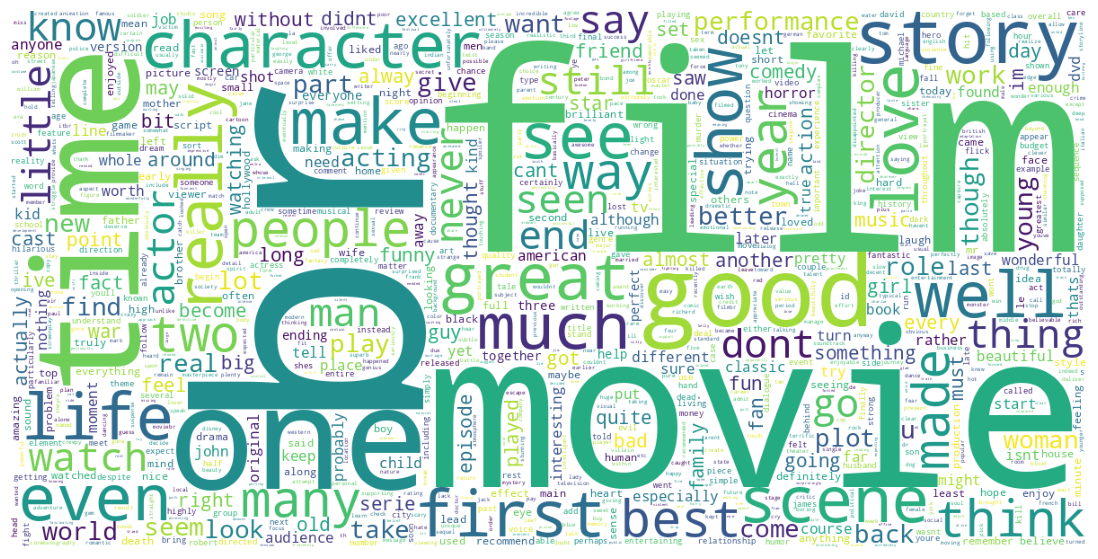

In [15]:
text_ = " ".join(i for i in df.loc[df['sentiment'] == 'positive'].review)
wc = WordCloud(background_color = "white", width = 1200, height = 600,
contour_width = 0, contour_color = "red", max_words = 1000,
scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text_)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

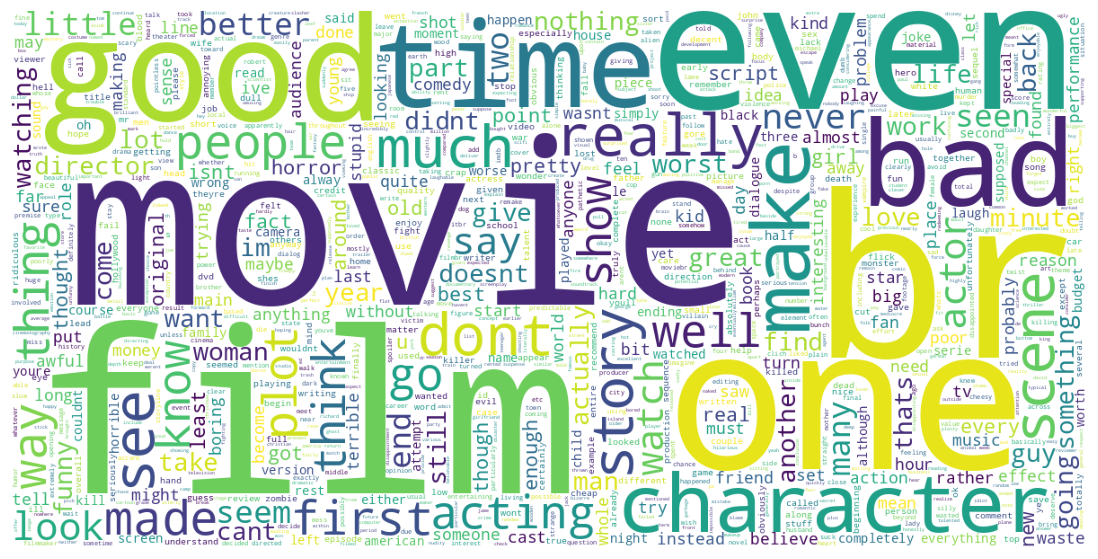

In [16]:
text_ = " ".join(i for i in df.loc[df['sentiment'] == 'negative'].review)
wc = WordCloud(background_color = "white", width = 1200, height = 600,
contour_width = 0, contour_color = "red", max_words = 1000,
scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text_)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

In [17]:
df

,review,sentiment
0,one reviewer mentioned watching oz episode yo...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,im going disagree previous comment side maltin...,negative


In [18]:
lb=LabelBinarizer()
#transformed sentiment data
df['sentiment']=lb.fit_transform(df['sentiment'])

In [19]:
df

,review,sentiment
0,one reviewer mentioned watching oz episode yo...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49995,thought movie right good job wasnt creative or...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary school nu...,0
49998,im going disagree previous comment side maltin...,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [21]:
#cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))


In [22]:
# X_train = cv.fit_transform(X_train)

# # Transform the test data
# X_test = cv.transform(X_test)


TRAINING MODEL 

The pipeline model will include two layer:
1.    An vectorizer layer which covert the text input into an vector with  values are the frequency the word appears in total dataset document 

2.  Multinomial Naive Bayes



In [23]:
pipeline = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('classifier', MultinomialNB())
])


We build model by cross validation approach. Using grid_search to find the best parameter dictionary 

In [24]:
# param_grid = {
#     'classifier__alpha': [0.1, 0.5,0.8, 1.0],
#     'vectorizer__min_df': [1, 2, 3],
#     'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
# }

param_grid = {
    'classifier__alpha': [0.8],
    'vectorizer__min_df': [ 3],
    'vectorizer__ngram_range': [(1, 1)]
}


In [25]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.8], 'vectorizer__min_df': [3],
                         'vectorizer__ngram_range': [(1, 1)]})

In [26]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Hyperparameters: {'classifier__alpha': 0.8, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 1)}
Best CV Score: 0.854125


In [27]:
with open('grid_search.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

In [28]:
with open('grid_search.pkl', 'rb') as file:
    grid_search_read = pickle.load(file)


In [29]:
y_predicted = grid_search_read.predict(X_test)

In [30]:
accuracy_grid_model = accuracy_score(y_test, y_predicted)


In [31]:
accuracy_grid_model

0.8586

MODULE PREDICTION

In [47]:
def preprocess(text):
    text = text.lower()
    text = " ".join(re.sub(r'[^a-zA-z0-9\s]', '', word) for word in text.split()) 
    text = re.sub(r'\d+', '', text)
    stop_words = set(stopwords.words("english"))
    text = " ".join(re.sub(r'http\S+', '', word) for word in text.split()) 
    text = " ".join(word for word in text.split() if text not in stop_words)
    text = " ".join([Word(word).lemmatize() for word in text.split()])
    if(grid_search_read.predict([text])):
      print('positive')
    else:
      print('negative')


In [49]:
preprocess('this is so bad')

negative
